In [1]:
#general definitions and imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os

import schemdraw
import schemdraw.elements as elm
from schemdraw import dsp
from schemdraw import logic

from IPython.display import display, HTML

# construction

I don't like working with breadboards. But sometimes you want to test things before you order a PCB. Connecting existing modules to the breadboard is especially tedious and building blocks like input mixer or output buffer occur in most circuits. This is where Steckfeld helps. It provides connectors for the patch cables and the necessary circuits for input and output. First, I made the resistors pluggable. But I never replaced them and finaly soldered them in.

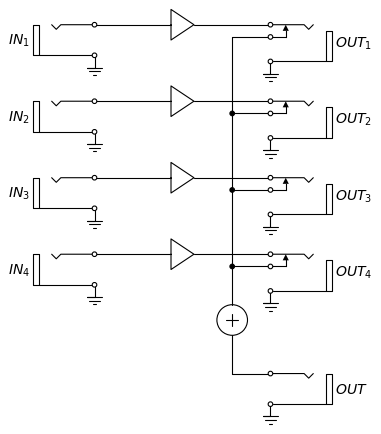

In [2]:
d = schemdraw.Drawing(unit=2.5, inches_per_unit=0.5, lw=1.1)

JI4 = d.add(elm.AudioJack(xy=[0, d.unit], lftlabel='$IN_4$'))
d.add(elm.Ground("right", xy=JI4.sleeve))
d.add(elm.Line( "right", l=d.unit, at=JI4.tip))
D4 = d.add(dsp.Amp())
d.add(elm.Line( "right", l=d.unit))
JO4 = d.add(elm.AudioJack("left", switch=True, flip=True, anchor='tip', rgtlabel='$OUT_4$'))
d.add(elm.Ground("right", xy=JO4.sleeve))

JI3 = d.add(elm.AudioJack(xy=[0, 2*d.unit], lftlabel='$IN_3$'))
d.add(elm.Ground("right", xy=JI3.sleeve))
d.add(elm.Line( "right", l=d.unit, at=JI3.tip))
D3 = d.add(dsp.Amp())
d.add(elm.Line( "right", l=d.unit))
JO3 = d.add(elm.AudioJack("left", switch=True, flip=True, anchor='tip', rgtlabel='$OUT_3$'))
d.add(elm.Ground("right", xy=JO3.sleeve))

JI2 = d.add(elm.AudioJack(xy=[0, 3*d.unit], lftlabel='$IN_2$'))
d.add(elm.Ground("right", xy=JI2.sleeve))
d.add(elm.Line( "right", l=d.unit, at=JI2.tip))
D2 = d.add(dsp.Amp())
d.add(elm.Line( "right", l=d.unit))
JO2 = d.add(elm.AudioJack("left", switch=True, flip=True, anchor='tip', rgtlabel='$OUT_2$'))
d.add(elm.Ground("right", xy=JO2.sleeve))

JI1 = d.add(elm.AudioJack(xy=[0, 4*d.unit], lftlabel='$IN_1$'))
d.add(elm.Ground("right", xy=JI1.sleeve))
d.add(elm.Line( "right", l=d.unit, at=JI1.tip))
D1 = d.add(dsp.Amp())
d.add(elm.Line( "right", l=d.unit))
JO1 = d.add(elm.AudioJack("left", switch=True, flip=True, anchor='tip', rgtlabel='$OUT_1$'))
d.add(elm.Ground("right", xy=JO1.sleeve))

d.add(elm.Line("left", l=d.unit/2, xy=JO1.tipswitch))
d.add(elm.Line("down"))

d.add(elm.Line("left", l=d.unit/2, xy=JO2.tipswitch))
d.add(elm.Dot())
d.add(elm.Line("down"))

d.add(elm.Line("left", l=d.unit/2, xy=JO3.tipswitch))
d.add(elm.Dot())
d.add(elm.Line("down"))

d.add(elm.Line("left", l=d.unit/2, xy=JO4.tipswitch))
d.add(elm.Dot())
d.add(elm.Line("down", l=d.unit/2))
S = d.add(dsp.Sum())  

d.add(elm.Line( "down", xy=S.E, l=d.unit/2))
d.add(elm.Line( "right", l=d.unit/2))
JO = d.add(elm.AudioJack("left", anchor="tip", flip=True, rgtlabel='$OUT$'))
d.add(elm.Ground("right", xy=JO.sleeve))

d.draw()


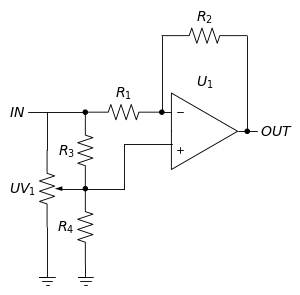

In [3]:
d = schemdraw.Drawing(unit=2.5, inches_per_unit=0.5, lw=0.9)

O = d.add(elm.Opamp( label='$U_1$'))

d.add(elm.Line( "left", xy=O.in1, l=d.unit/8))
R1 = d.add(elm.Resistor( "left", label='$R_1$'))
d.add(logic.Dot())    
R2 = d.add(elm.Resistor( "down", label='$R_3$'))
d.add(elm.Resistor( "down", label='$R_4$'))
d.add(elm.Ground)

L1 = d.add(elm.Line('left', l=d.unit/2, xy=R1.end))
d.add(elm.Line('down', l=d.unit/2))
RV = d.add(elm.Potentiometer('down', toplabel='$UV_1$'))
d.add(elm.Line('down', l=d.unit/2))
d.add(elm.Ground)

d.add(elm.Line('left', l=d.unit/4, xy=L1.end, lftlabel='$IN$'))

d.add(elm.Line('right', tox=R2.end, xy=RV.tap))
d.add(logic.Dot())

d.add(elm.Line('right', l=d.unit/2, xy=R2.end))
d.add(elm.Line('up', l=d.unit*0.58))
d.add(elm.Line('right', l=d.unit*0.63))

d.add(logic.Dot(xy=R1.start))
d.add(elm.Line('up', l=d.unit))
d.add(elm.Resistor('right', label='$R_2$', tox=O.out+d.unit/8))
d.add(elm.Line('down', toy=O.out))
d.add(logic.Dot())

d.add(elm.Line('right', l=d.unit/4, xy=O.out, rgtlabel='$OUT$'))

d.draw()

the circuit of the attenuverter is based on the opamp dfferential amplifer. the two resistors at the non-inverting inputs are replaced with a potentiometer. the potentiometer is configured as a voltage divider and replace R3 and R4 from the differential amplifier. when the position of the potentiometer is adjusted, the output voltage will change or invert. at the center position  the output is zero volrs. the response to the potentiometer is linear. we can make it an centered s-curve by adding two parallel resistors (R5,R6) to the potentiometer [[2][2]].

a simulation with the resistance at RV 1 changed from 0-100%. first run is the linear result. the second run is done with the resistors R5 and R6 added. This results in a s curve. the shape of the curve can be changed with the values of the resistors.

# usage

the input jacks are wired to 5 volts when nothing is connected.

all channels are mixed to the out jack. when something is connected to the channel out, this channel is removed from the overall mix.

## _mixer_
* connect the different channels from audio or cv sources to the in jacks.
* connect the out jack to something
* turn the pots clockwise to adjust the volume.

## _attenuverter_
* connect all or a single channel. 
* when you turn the pot knob counter clockwise the signal is inverted.


